#### Loan Application Status Prediction
#### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 
 

In [1]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score


In [137]:
# READING THE DATASET
df=pd.read_csv("loan_prediction.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


- As we can see, the provided dataset is containing several details of applicants who have applied for loan. Depending upon those above mentioned features likeoan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, Loan_Amount, Loan_Amount_Term, Credit History,Property_Area; we need to predict the loan_status, either the loan can be granted or not. As we need to classify the loan status it is a Binary Classification type of problem.

In [138]:
df.shape

(614, 13)

- The dataset contains 614 rows and 13 columns.

In [139]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

The dataset contains, 
- 'Loan_ID'- unique id of an applicant(we will drop this feature as it a unnecessory data),
- 'Gender'- Sex of an Applicant, 
- 'Married'- marital status of an applicant, 
- 'Dependents'- the number of dependents of an applicant, 
- 'Education'- How much educated an applicant is,
- 'Self_Employed'- an applicant is self-employed or not,
- 'ApplicantIncome'- income of an applicant, 
- 'CoapplicantIncome'- income of co-applicant, 
- 'LoanAmount'- the loan amount ,
- 'Loan_Amount_Term'- fixed duration for repayment,
- 'Credit_History'-  record of an applicants ability to repay debts,
- 'Property_Area'- Where the applicant lives in.
these above mentioned features are the independent variable depending upon which we need to predict the Loan status.

In [140]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- There is missing values in several features that we need to take care of.

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- The dataset is mixture of categorical, nominal and numerical values. And null values are also present in this dataset.

In [142]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

- Different columns are containing different counts of categories like, Loan_ID column is having unique ids of applicants that we need to drop before model creation . The target variable, Loan_Status is having 2 categories , so it  binary class containing column and we will do binary classification.

In [143]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- The data is good blend of objects, integer and floats.

In [144]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


 The statistics of the dataset is showing,
- There is missing values in LoanAmount,Loan_Amount_Term,Credit_History columns as the count should be 614.
- The standard deviation of ApplicantIncome is greater than mean value, it means there is skewness in the data.
- The gap between quartile3 and maximum applicant income is big, so there must be presence of skewness in the data.
- The standard deviation of CoapplicantIncome is greater than mean value, it means there is skewness in the data.
- The minimum value of CoapplicantIncome is showing 0, maybe some skewness is there.
- The gap between quartile-3 and LoanAmount is big, might be there is some skewness present.


#### Data Analysis:

We will do Univariate Analysis to understand the distribution of continuous features and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.

Let's do that:

#### Univariate Analysis:
before analysis we will take all the continuous and numerical data into single variable.

In [145]:
con_features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

#### Visualization:

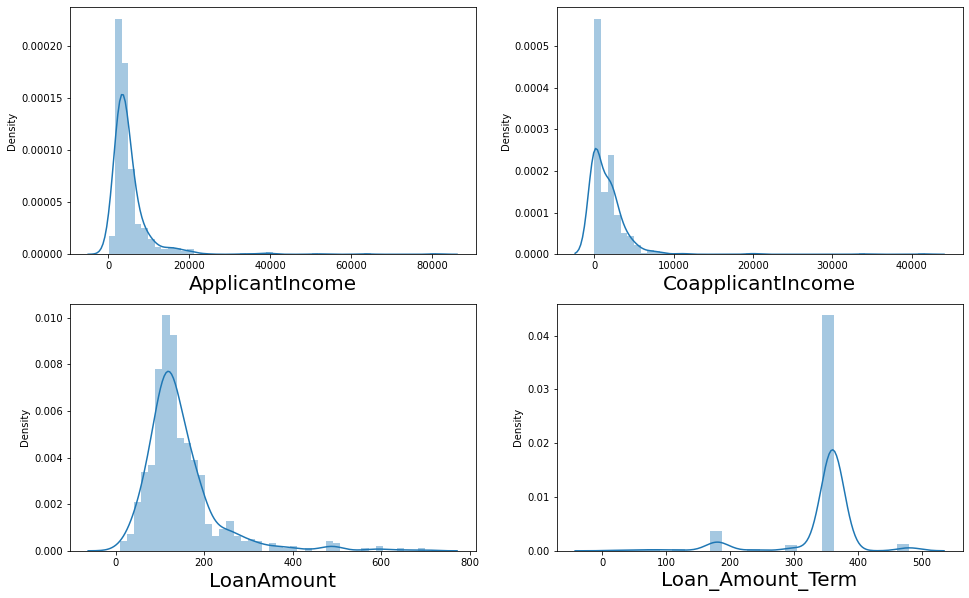

In [146]:
plt.figure(figsize=(16,10),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(con_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- As we can see, all the continuous features are more or less skewed. Hence we need to take care of those before model creation.


Now lets analyze the Target variable.

Y    422
N    192
Name: Loan_Status, dtype: int64

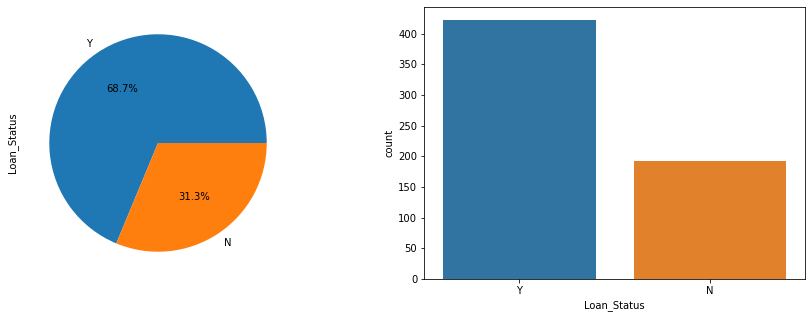

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Loan_Status'])
df['Loan_Status'].value_counts()

- As we can see, the target variable 'Loan_Status' is having 2 categories on basis of the loan is granted or not. As the count of Loan granted(Y) 422 is greater than Loan not granted(N) 192 and the difference is big, the target variable is unbalanced. 

Male      489
Female    112
Name: Gender, dtype: int64

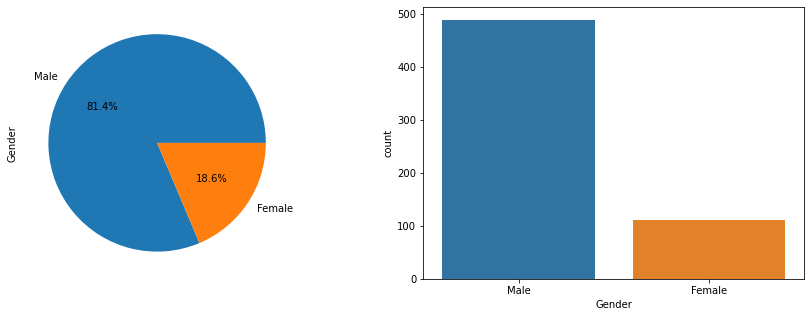

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Gender'])
df['Gender'].value_counts()

- More male applicants (489) than female applicants (112).

Yes    398
No     213
Name: Married, dtype: int64

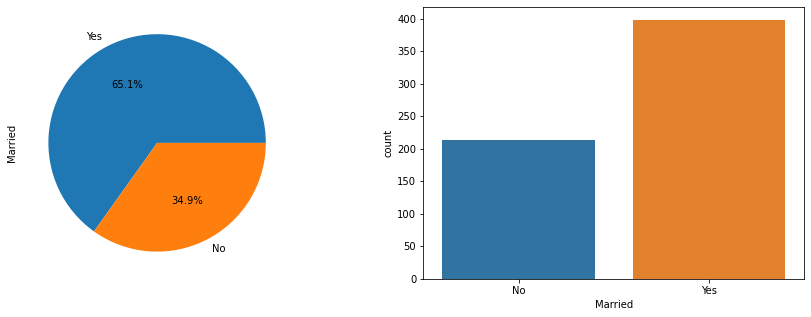

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Married'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Married'])
df['Married'].value_counts()

- Marriad applicants (398) are more in counts than Unmarried applicants (213).

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

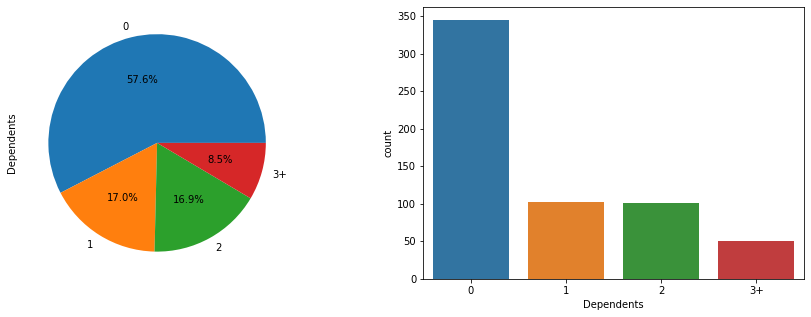

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Dependents'])
df['Dependents'].value_counts()

- The column is containing the number of dependents of an applicant. There are 4 categories in the feature, out of whic 0 is containing highest count 345(57.6%) and 3+ is containg least count of data 51(8.5%).

No     500
Yes     82
Name: Self_Employed, dtype: int64

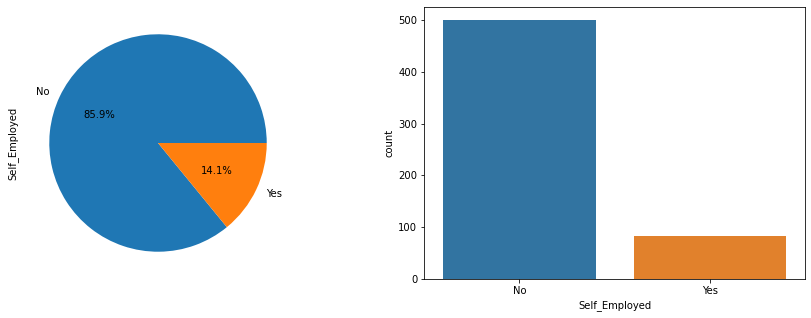

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Self_Employed'])
df['Self_Employed'].value_counts()

- The Number of self-employed applicants is lower 500 (85.9%) than applicants who are not self-employed 82(14.1%).

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

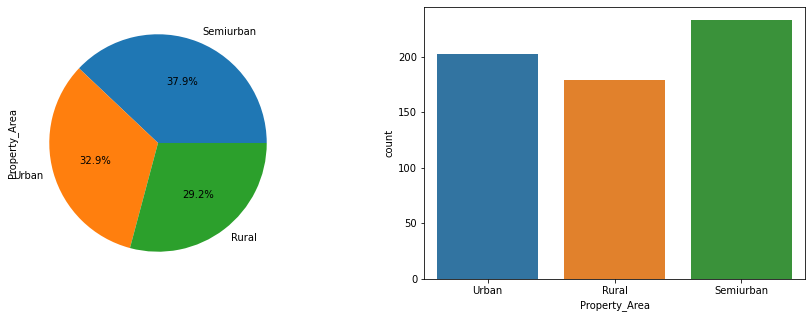

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Property_Area'])
df['Property_Area'].value_counts()

- Applicants are having 3 types of properties,- Urban, Rural and Semiurban. Out of which Semiurban properties are highest in counts 233(37.9%).

1.0    475
0.0     89
Name: Credit_History, dtype: int64

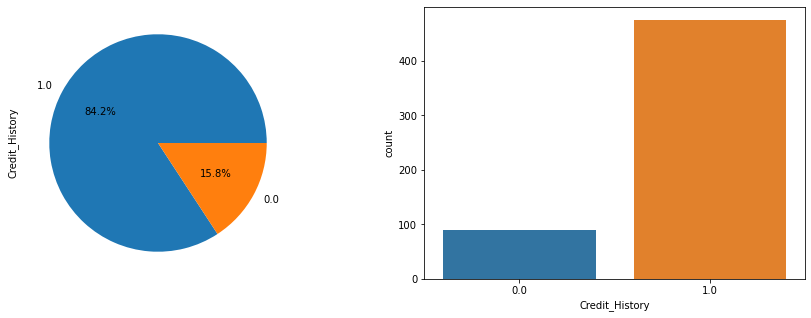

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Credit_History'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Credit_History'])
df['Credit_History'].value_counts()

- Credit_History feature is having 2 categories. Out of which category 1 is having more counts than 475 than category 0. As loan givers or banks check our credit history before granting any loan, people who have good credit history get the loan the faster than people who have bad credit history.

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

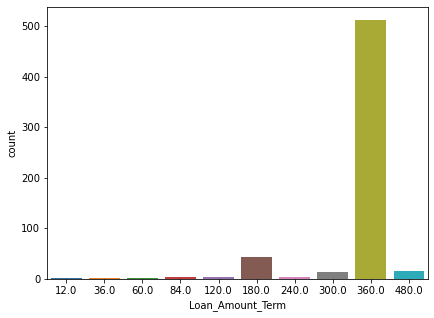

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['Loan_Amount_Term'])
df['Loan_Amount_Term'].value_counts()

- Loan_Amount_Term feature is having 10 different categories. Out of which 360.0 is having the highest count 512.
May be this column is containing months as loan amount term. Like 12 months,36 months and so on.


#### Outlier Detection:
We are using Boxplot to check outliers.

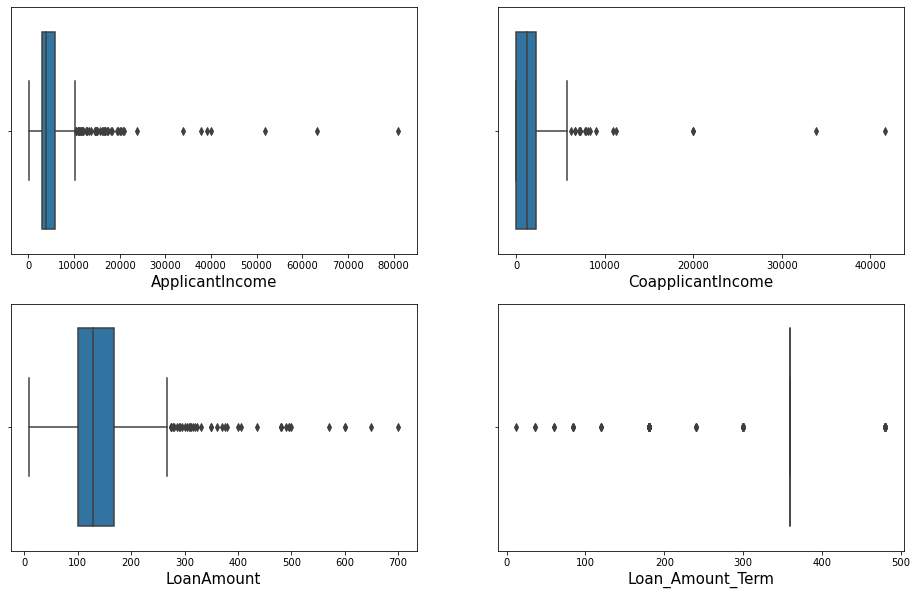

In [19]:
plt.figure(figsize=(16,10),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(con_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()  

- After checking the box plot we can say that there are so many outliers in the continuous variables of the dataset that we need to get rid of. 

In [147]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

- As we can see, all the continuous variables are having skewness that we need to take care of before model creation.

Now Let's convert the target variable into numbers and then separate the target and the features to check the relation between target and features.

For encoding the target we are using Label Encoder.

In [148]:
l = LabelEncoder()
l_s = ['Loan_Status']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [149]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


- As we can see, the target is encoded into numericals. Now let's divide the dataset into arget and the features to check the relation between target and features.

In [41]:
#### dividing the feature and label for further operations:
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'])


#### Bivariate analysis:
- Checking the relation between Loan_Status with continuous features first.

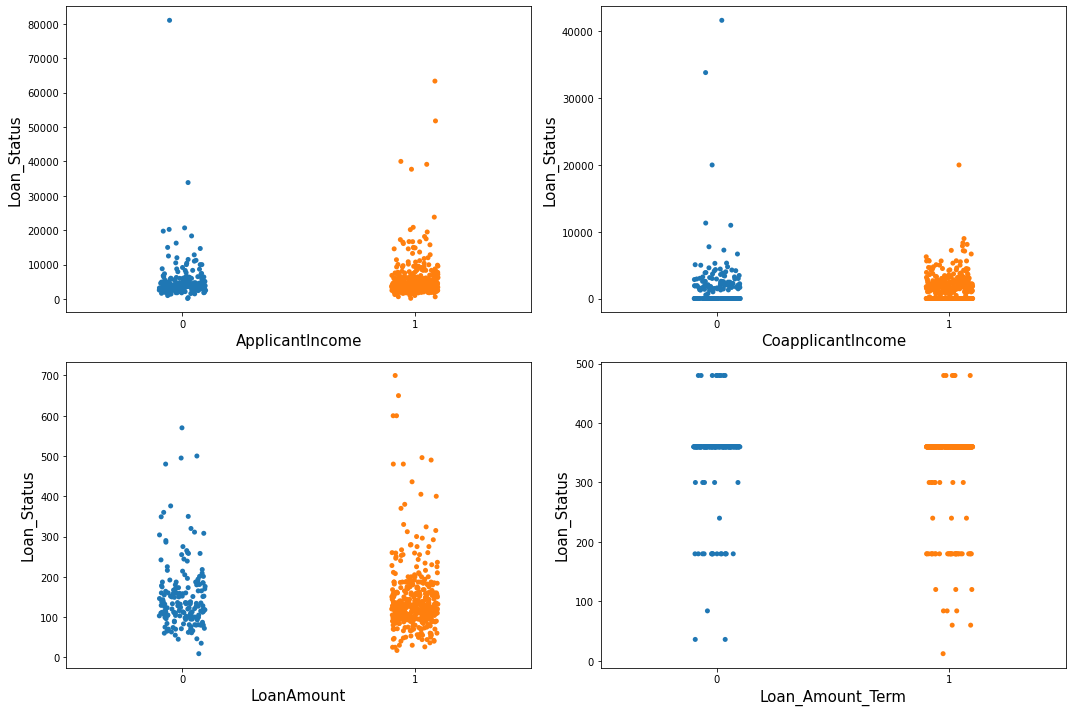

In [46]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.stripplot(y,con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Loan_Status',fontsize=15)
    plotnumber+=1
plt.tight_layout()

- As we can see more applicant's income more likely to get a loan.
- More income of Coapplicant more likely to get a loan.
- More loan amount more likely to get a loan.
- Loan is granted to the applicants who payback the loan amount in less time.


Let's check the relation between Loan_Status with categorical features as well.

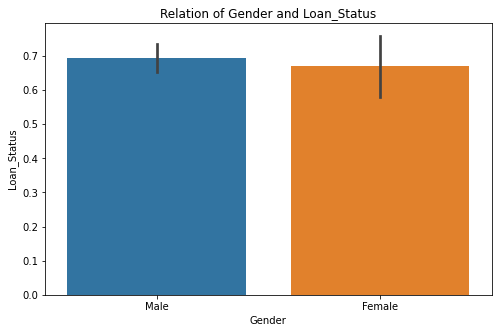

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='Gender',y='Loan_Status',data=df).set_title('Relation of Gender and Loan_Status')
plt.show()

- Loan has given to male female respectively.

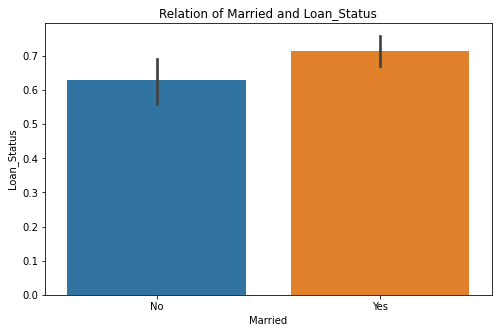

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x='Married',y='Loan_Status',data=df).set_title('Relation of Married and Loan_Status')
plt.show()

- Married people are most likely to get loans than single people.

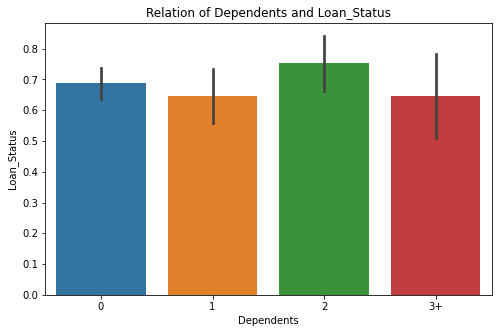

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x='Dependents',y='Loan_Status',data=df).set_title('Relation of Dependents and Loan_Status')
plt.show()

- Applicants who have 2 dependents or 0 dependents are more likely to get loan than other applicants with more dependents.

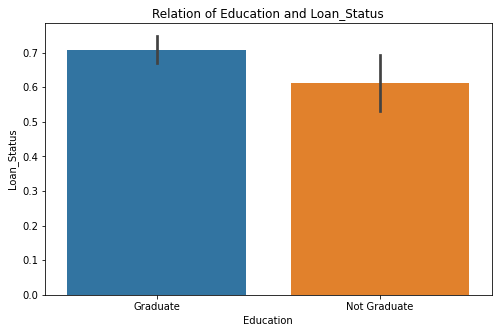

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='Education',y='Loan_Status',data=df).set_title('Relation of Education and Loan_Status')
plt.show()

- Graduate people are more likely to get loan than non graduate applicants.

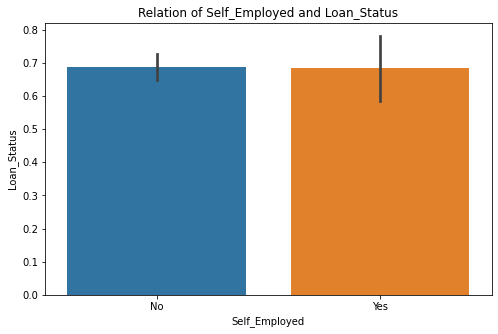

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x='Self_Employed',y='Loan_Status',data=df).set_title('Relation of Self_Employed and Loan_Status')
plt.show()

- Loan is not granted on the basis of self-employment.

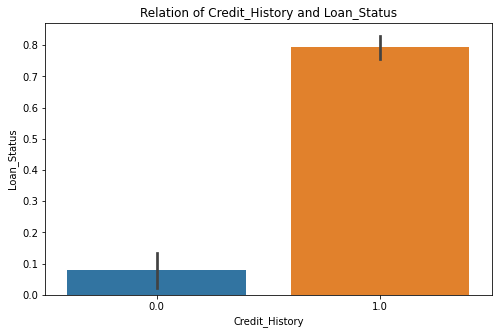

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x='Credit_History',y='Loan_Status',data=df).set_title('Relation of Credit_History and Loan_Status')
plt.show()

- Applicants with good credit history ( categori 1) are more likely to get loans than applicants who do not have good credit history.

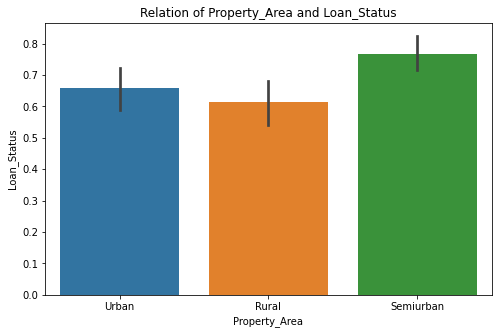

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x='Property_Area',y='Loan_Status',data=df).set_title('Relation of Property_Area and Loan_Status')
plt.show()

- People with Semiurban properties are more likely to get loans than urban and rural property holders.

#### Mutivariate Analysis:

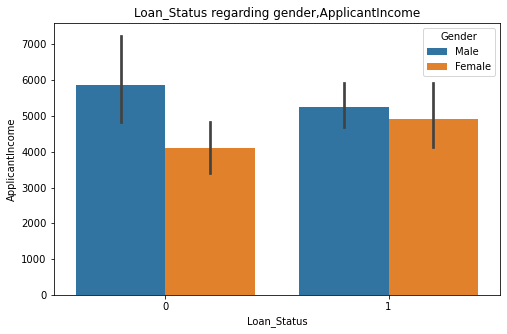

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x='Loan_Status',y='ApplicantIncome',hue='Gender',data=df).set_title('Loan_Status regarding gender,ApplicantIncome')
plt.show()

- Male applicants who's income is less are more likely to get loan than female applicants.

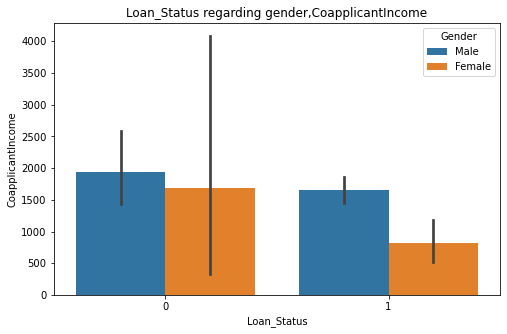

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Loan_Status',y='CoapplicantIncome',hue='Gender',data=df).set_title('Loan_Status regarding gender,CoapplicantIncome')
plt.show()

- Male co-applicants who's income is less are more likely to get loan than female applicants.

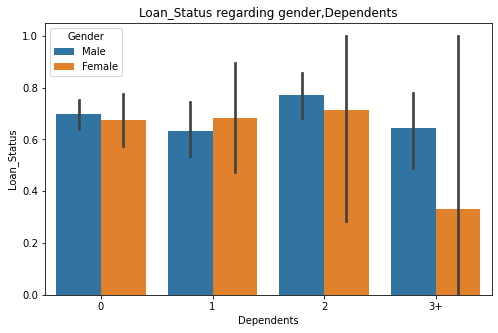

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='Dependents',y='Loan_Status',hue='Gender',data=df).set_title('Loan_Status regarding gender,Dependents')
plt.show()

- Male applicats with 2 dependents are more likely to get loan than other male or female applicants with other categories of dependents.

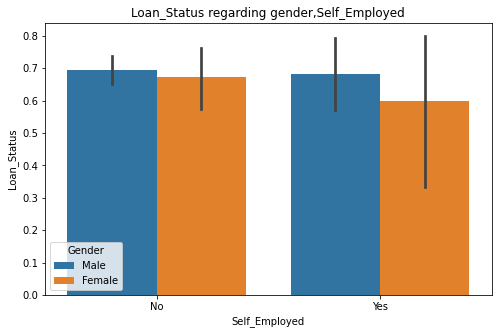

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x='Self_Employed',y='Loan_Status',hue='Gender',data=df).set_title('Loan_Status regarding gender,Self_Employed')
plt.show()

- Loan is not granted on the basis of self-employment.

Let's Check the correlations of feature vs feature and feature vs target:

In [151]:
corr=df.corr()
corr.shape

(6, 6)

#### Plotting heatmap (correlation matrix)

Let's try to see if we can reduce the features using different techniques. Let's plot Heatmap to visualize and find the coefficient and multicolinearity.

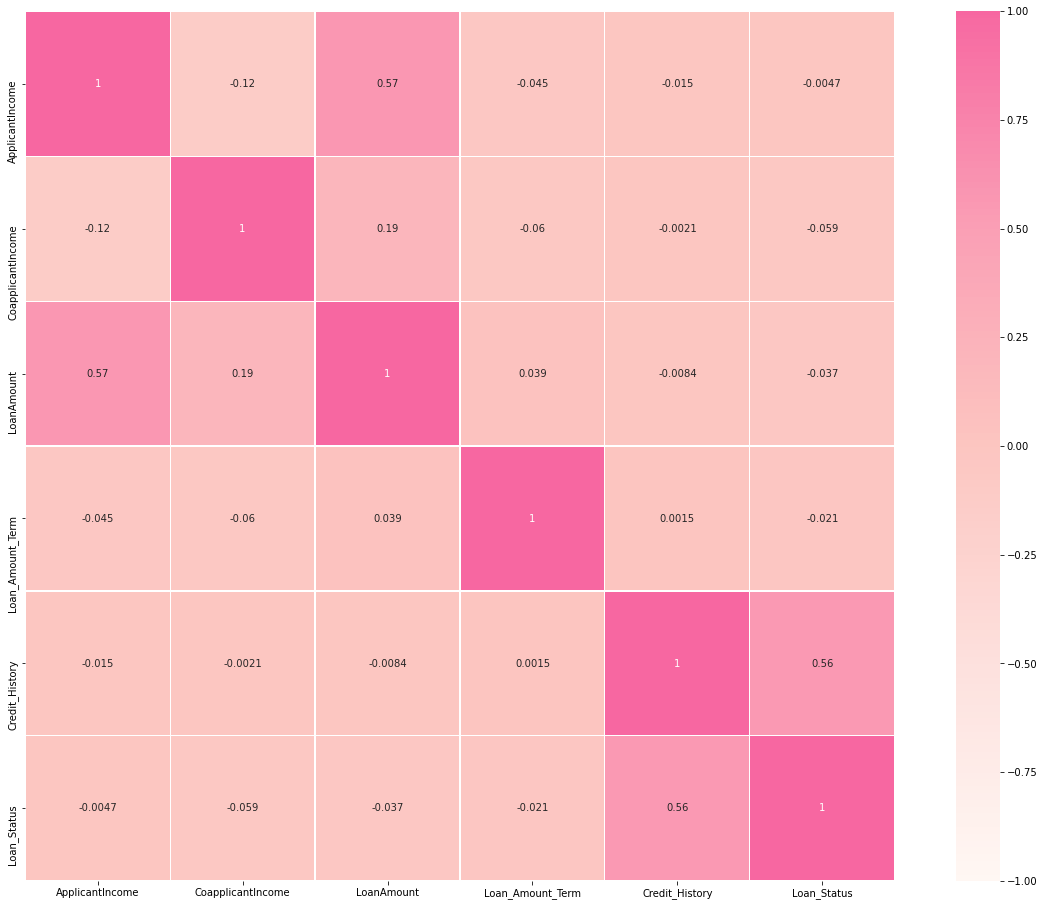

In [152]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='RdPu',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- Least correlation between features important for Classification problem.
- No feature is correlated with each other.
- Loan Amount and Credit History has a good correlation with target variable.

#### Data Cleaning:

- Missing values removal:

There are so many missing values present in different features. We will fill those using mean or median depending upon requirements.

In [155]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [156]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [157]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [158]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [159]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [160]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [161]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

- We have used median method to fill missing values from continuous data and mode for filling categorical data.

In [162]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- As we can see there is no missing value present in the dataset after filling those with median and  mode.

#### Encoding:

Now let's encode the nominal and categorical data into numerical data to use in model. For that we are using ordinal encoder.

In [163]:
en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1


- As we can see all the nominal data is encoded into numerical data.

Now let's drop the unique id column as it's not bearing any important data.

In [167]:
drop_column=['Loan_ID']  #Drop Alert
df=df.drop(columns=drop_column,axis=1)

- After dropping the unnecessory column we are going to check the skewness and remove those skewness.

In [65]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

- Most of the features consists of skewness, we need to remove those.

#### Outlier Removal:

- For Outlier removal we are using z-score.

In [165]:
z_score = zscore(df[['Gender','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome',
                'LoanAmount','Loan_Amount_Term','Credit_History']])     
abs_z_score=np.abs(z_score)#converting data into standard normal distribution

filtering_entry=(abs_z_score<3.5).all(axis=1)

df=df[filtering_entry]
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,302.673504,0.817094,0.651282,0.723077,0.225641,0.128205,4756.025641,1421.982769,136.960684,346.974359,0.852991,1.029060,0.692308
std,177.167394,0.386920,0.476972,0.997547,0.418361,0.334604,3161.724275,1693.294145,61.213640,54.022202,0.354417,0.787864,0.461933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,120.000000,0.000000,0.000000,0.000000
25%,148.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2833.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,301.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3750.000000,1229.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,455.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5667.000000,2250.000000,160.000000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,23803.000000,10968.000000,436.000000,480.000000,1.000000,2.000000,1.000000


- As we can see, all the outliers of the data are removed and it is now looking better. Let's remove the skewness as well.

In [166]:
df.skew()

Loan_ID              0.016850
Gender              -1.644689
Married             -0.636519
Dependents           1.044111
Education            1.316088
Self_Employed        2.229920
ApplicantIncome      2.269125
CoapplicantIncome    1.535617
LoanAmount           1.424895
Loan_Amount_Term    -2.157886
Credit_History      -1.998786
Property_Area       -0.051356
Loan_Status         -0.835477
dtype: float64

- Before remove the skewness we will replace the minimum value 0 from co-applicant income feature. 

In [168]:
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(0,df['CoapplicantIncome'].median())

- As the 0 value is replaced, now we will remove the skewness from the data by using Power Transformer.
For that we will instantiate the features with skewness into a single variable.

In [212]:
features=['Gender','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome',
          'LoanAmount','Loan_Amount_Term','Credit_History']

In [213]:
scaler=PowerTransformer(method='yeo-johnson')  #using yeo-johnson method

In [214]:
df[features]=scaler.fit_transform(df[features].values)#scaling the features

In [215]:
df[features]

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.473127,-0.811325,-0.539806,-0.383482,0.663752,-0.580409,0.008058,0.149383,0.415144
1,0.473127,0.895954,-0.539806,-0.383482,0.240940,-0.187904,0.008058,0.149383,0.415144
2,0.473127,-0.811325,-0.539806,2.607681,-0.511571,-0.580409,-1.379968,0.149383,0.415144
3,0.473127,-0.811325,1.852517,-0.383482,-0.782007,0.635243,-0.137546,0.149383,0.415144
4,0.473127,-0.811325,-0.539806,-0.383482,0.707627,-0.580409,0.230250,0.149383,0.415144
...,...,...,...,...,...,...,...,...,...
609,-2.113596,-0.811325,-0.539806,-0.383482,-0.572675,-0.580409,-1.238633,0.149383,0.415144
610,0.473127,1.531452,-0.539806,-0.383482,0.048175,-0.580409,-2.273799,-2.559549,0.415144
611,0.473127,0.895954,-0.539806,-0.383482,1.215223,-3.801379,1.690468,0.149383,0.415144
612,0.473127,1.340387,-0.539806,-0.383482,1.108686,-0.580409,0.908676,0.149383,0.415144


- Now the features are looking way better than before.

In [216]:
df.skew()

Gender              -1.644689
Married             -0.636519
Dependents           0.473772
Education            1.316088
Self_Employed        2.229920
ApplicantIncome     -0.255246
CoapplicantIncome   -0.712084
LoanAmount          -0.047797
Loan_Amount_Term     0.415847
Credit_History      -1.998786
Property_Area       -0.051356
Loan_Status         -0.835477
dtype: float64

- The skewness is almost gone and our data is ready.

Now, let's do model creation, but before that we will separate the dataset into target and features.

In [217]:
y=df['Loan_Status']
x=df.drop(columns=['Loan_Status'])

- After separation we will balance the target variable. Let's do it.

In [218]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [219]:
y.value_counts()

1    405
0    405
Name: Loan_Status, dtype: int64

- Our target variable is balanced now we will standardize the features as they are in different scales.

#### Standardization:

In [220]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

##### Hold Out Method:

Model will be built on Hold Out method(75/25 training and test split) to gauge how well the classifier is working.

In [221]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

#### Model Creation:
Now let's see the Accuracy scores according to six models we have used below. we are using models like,
1. Logistic Regression,
2. Decision Tree Classifier,
3. Random Forest Classifier,
4. K-Nearest Neighbors Classifier,
5. Gradient Boosting Classifier,
6. Support Vector Classifier.

#### 1. Logistic Regression:

In [222]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")
      


=======================Train Result===========================
Accuracy score:72.32%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.922581    0.654867  0.723229    0.788724      0.786739
recall       0.478261    0.961039  0.723229    0.719650      0.723229
f1-score     0.629956    0.778947  0.723229    0.704452      0.705556
support    299.000000  308.000000  0.723229  607.000000    607.000000
________________________________________________________________
 Confusion Matrix:
[[143 156]
 [ 12 296]]



In [223]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print("\n=======================Test Result of LR ===========================")
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")      
      


=======================Test Result of LR ===========================
Accuracy score:71.43%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.961538   0.629139  0.714286    0.795339      0.802707
recall       0.471698   0.979381  0.714286    0.725540      0.714286
f1-score     0.632911   0.766129  0.714286    0.699520      0.696567
support    106.000000  97.000000  0.714286  203.000000    203.000000
________________________________________________________________
 Confusion Matrix:
[[50 56]
 [ 2 95]]



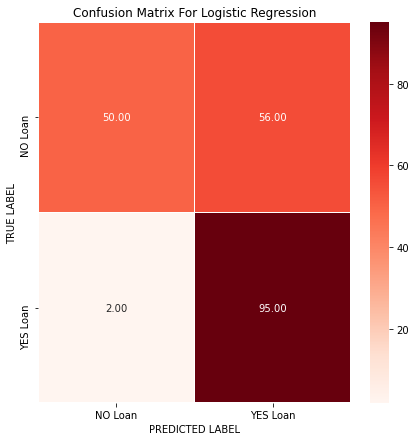

In [224]:
cm = confusion_matrix(y_test,lr_pred)

x_axis_labels=['NO Loan','YES Loan']
y_axis_labels=['NO Loan','YES Loan']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Logistic Regression')

plt.show()

In [225]:
#checking ROC_AUC Score of Logistic Regression:
roc_auc_score(y_test,lr.predict(x_test))

0.7255397782532581

#### 2.  Decision Tree Classifier :

In [226]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    299.0  308.0       1.0      607.0         607.0
________________________________________________________________
 Confusion Matrix:
[[299   0]
 [  0 308]]



In [227]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print("\n=======================Test Result of dt_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")      
      


=======================Test Result of dt_clf===========================
Accuracy score:80.30%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.823529   0.782178  0.802956    0.802854      0.803770
recall       0.792453   0.814433  0.802956    0.803443      0.802956
f1-score     0.807692   0.797980  0.802956    0.802836      0.803051
support    106.000000  97.000000  0.802956  203.000000    203.000000
________________________________________________________________
 Confusion Matrix:
[[84 22]
 [18 79]]



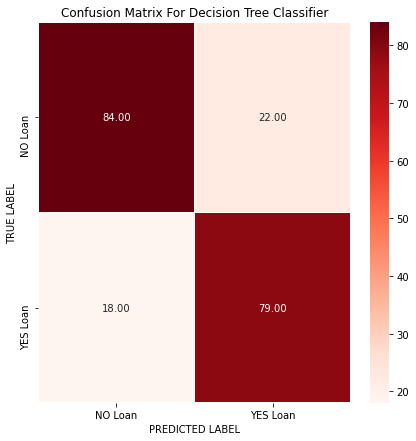

In [228]:
cm = confusion_matrix(y_test,dt_pred)

x_axis_labels=['NO Loan','YES Loan']
y_axis_labels=['NO Loan','YES Loan']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [229]:
#ROC_AUC Score of Decision Tree Classifier:
roc_auc_score(y_test,dt.predict(x_test))

0.8034429099397005

#### 3. Random Forest Classifier :

In [264]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    299.0  308.0       1.0      607.0         607.0
________________________________________________________________
 Confusion Matrix:
[[299   0]
 [  0 308]]



In [265]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print("\n=======================Test Result of RF_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")    


=======================Test Result of RF_clf===========================
Accuracy score:85.71%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.932584   0.798246  0.857143    0.865415      0.868393
recall       0.783019   0.938144  0.857143    0.860582      0.857143
f1-score     0.851282   0.862559  0.857143    0.856921      0.856671
support    106.000000  97.000000  0.857143  203.000000    203.000000
________________________________________________________________
 Confusion Matrix:
[[83 23]
 [ 6 91]]



Text(0.5, 1.0, 'Confusion Matrix For Random Forest Classifier')

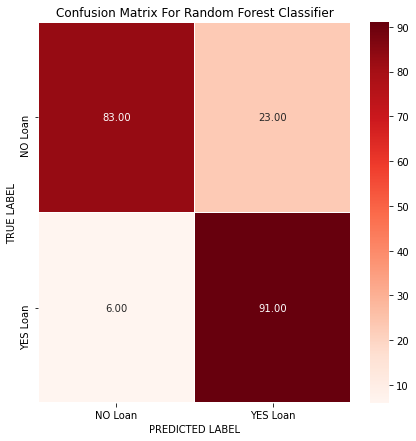

In [266]:
cm = confusion_matrix(y_test,rf_pred)

x_axis_labels=['NO Loan','YES Loan']
y_axis_labels=['NO Loan','YES Loan']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')

In [267]:
#ROC_AOC Score of Random Forest Classifier:

roc_auc_score(y_test,rf.predict(x_test))

0.8605815989107176

#### 4. K-Neighbors Classifier :

In [234]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")


=======================Train Result===========================
Accuracy score:86.33%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.839623    0.889273  0.863262    0.864448      0.864816
recall       0.892977    0.834416  0.863262    0.863696      0.863262
f1-score     0.865478    0.860972  0.863262    0.863225      0.863191
support    299.000000  308.000000  0.863262  607.000000    607.000000
________________________________________________________________
 Confusion Matrix:
[[267  32]
 [ 51 257]]



In [235]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print("\n=======================Test Result of KNN_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")      
      


=======================Test Result of KNN_clf===========================
Accuracy score:72.91%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.733945   0.723404  0.729064    0.728675      0.728908
recall       0.754717   0.701031  0.729064    0.727874      0.729064
f1-score     0.744186   0.712042  0.729064    0.728114      0.728827
support    106.000000  97.000000  0.729064  203.000000    203.000000
________________________________________________________________
 Confusion Matrix:
[[80 26]
 [29 68]]



Text(0.5, 1.0, 'Confusion Matrix For K-Nearest Neighbor Classifier')

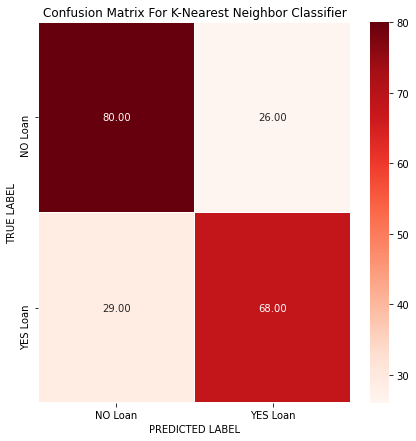

In [236]:
cm = confusion_matrix(y_test,kn_pred)

x_axis_labels=['NO Loan','YES Loan']
y_axis_labels=['NO Loan','YES Loan']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For K-Nearest Neighbor Classifier')

In [237]:
#ROC_AUC Score of K-Nearest Kneibors Classifier:

roc_auc_score(y_test,kn.predict(x_test))

0.7278739544835635

#### 5. Gradient Boosting Classifier:

In [238]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")


=======================Train Result===========================
Accuracy score:90.28%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.976190    0.850704  0.902801    0.913447      0.912517
recall       0.822742    0.980519  0.902801    0.901631      0.902801
f1-score     0.892922    0.911011  0.902801    0.901966      0.902100
support    299.000000  308.000000  0.902801  607.000000    607.000000
________________________________________________________________
 Confusion Matrix:
[[246  53]
 [  6 302]]



In [239]:
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n") 


=======================Test Result===========================
Accuracy score:83.74%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.939759   0.766667  0.837438    0.853213      0.857050
recall       0.735849   0.948454  0.837438    0.842151      0.837438
f1-score     0.825397   0.847926  0.837438    0.836662      0.836162
support    106.000000  97.000000  0.837438  203.000000    203.000000
________________________________________________________________
 Confusion Matrix:
[[78 28]
 [ 5 92]]



Text(0.5, 1.0, 'Confusion Matrix Of Gradient Boosting Classifier')

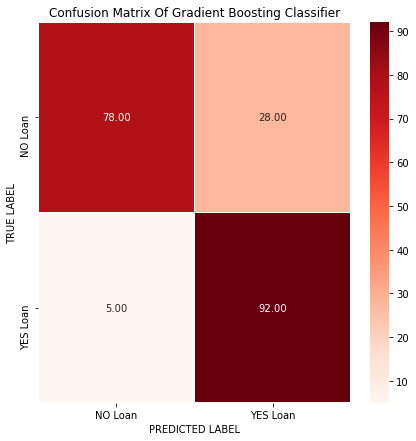

In [240]:
cm = confusion_matrix(y_test,pred)

x_axis_labels=['NO Loan','YES Loan']
y_axis_labels=['NO Loan','YES Loan']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of Gradient Boosting Classifier')

In [241]:
#ROC_AUC Score of Gradient Boosting Classifier:
roc_auc_score(y_test,gbdt_clf.predict(x_test))

0.8421513324255981

#### 6.  Support Vector Classifier:

In [242]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")


=======================Train Result===========================
Accuracy score:79.90%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.919431    0.734848  0.799012    0.827140      0.825771
recall       0.648829    0.944805  0.799012    0.796817      0.799012
f1-score     0.760784    0.826705  0.799012    0.793744      0.794233
support    299.000000  308.000000  0.799012  607.000000    607.000000
________________________________________________________________
 Confusion Matrix:
[[194 105]
 [ 17 291]]



In [243]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print("\n=======================Test Result of SVC===========================")
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")      
      


=======================Test Result of SVC===========================
Accuracy score:73.89%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.853333   0.671875  0.738916    0.762604      0.766627
recall       0.603774   0.886598  0.738916    0.745186      0.738916
f1-score     0.707182   0.764444  0.738916    0.735813      0.734544
support    106.000000  97.000000  0.738916  203.000000    203.000000
________________________________________________________________
 Confusion Matrix:
[[64 42]
 [11 86]]



Text(0.5, 1.0, 'Confusion Matrix Of SVC')

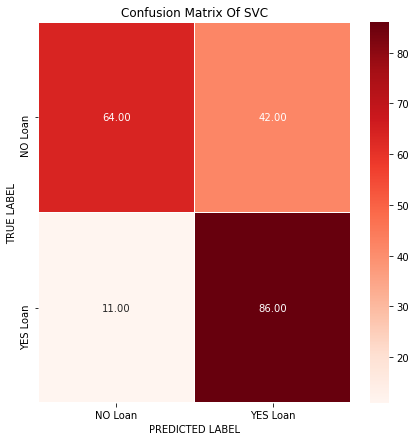

In [244]:
cm = confusion_matrix(y_test,svc_pred)

x_axis_labels=['NO Loan','YES Loan']
y_axis_labels=['NO Loan','YES Loan']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of SVC')

In [245]:
#ROC_AUC Score of SVC:
roc_auc_score(y_test,svc.predict(x_test))

0.745185761524995

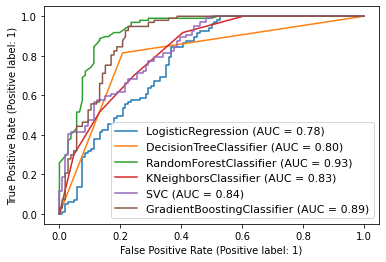

In [246]:
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### Observation:

We have seen that Random Forest Classifier has given the best accuracy of 85.71% regarding Loan status prediction. now let's check the cross validation scores of the models.

##### Cross validation :

 Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.


In [253]:
#Checking Cross Validation score for Logistic Regression:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:70.74%


In [254]:
#Checking Cross Validation score of Decision Tree Classifier:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:78.27%


In [255]:
#Checking Cross Validation
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:83.46%


In [250]:
# Checking Cross Validation Score of KNN:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:76.17%


In [251]:
#Checking Cross Validation Score of SVC:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:72.59%


In [252]:
#Checking Cross Validation Score of SVC:
print(f"CV Score of Gradient Boosting Classifier:{cross_val_score(gbdt_clf,x,y,cv=5).mean()*100:.2f}%")

CV Score of Gradient Boosting Classifier:80.25%


Now let's check the difference between Acuuracy Score and Cross Validation Score to select the best model from the 6 models:

- Diffrence betwwwn Accuracy score and Cross Validation Score of 6 different models :
- LR = 71.43-70.74 = 0.69 
- DT = 80.30-78.40 = 1.90 
- Rf = 85.22-83.46 = 1.76 
- KNN = 72.91-76.17 = -3.26 
- SVC = 73.89-72.59 = 1.30
- Gbdt_clf = 83.74-80.25 = 3.49

So, as the difference of Accuracy Score and CV of Random Forest Classifier is less and Accuracy score is highest. Let's do Hyperparameter Tuning of RFC.


##### Hyperparameter Tuning:

Now we will use Grid Search Technique to tune the hyperparameter of Random Forest Classifier model. After getting the best parameters we can put those into the model to obtain best Accuracy.

In [259]:
rf = RandomForestClassifier()
params={'n_estimators':[12,13,15,20],'max_features':['auto', 'sqrt','log2'],'criterion':['entropy','gini'],
        'max_depth':[10,13,15,20],'min_samples_split':[10,12,11,13],'min_samples_leaf':[4,5,6,9]}

grd= GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

rfc=grd.best_estimator_ #reinstantiating with best params
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rfc_conf_mat)
print('Accuracy of rf After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}
con_mat=>  
 [[76 30]
 [ 2 95]]
Accuracy of rf After Hyperparameter Tuning==>  84.23645320197043


#### Observation:
After Hyperparameter tuning the accuracy of Random Forest Classifier model is 84% and it's not increased after tuning. Hence, we are going to save the prior Random Forest Classifier model.

But before that let's check the Classification report after paramter tuning.

In [260]:
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.97      0.72      0.83       106
           1       0.76      0.98      0.86        97

    accuracy                           0.84       203
   macro avg       0.87      0.85      0.84       203
weighted avg       0.87      0.84      0.84       203



- The Classification report is showing less accuracy after Hyperparameter tuning. Hence we will save the prior RFC model as it's accuracy is best.

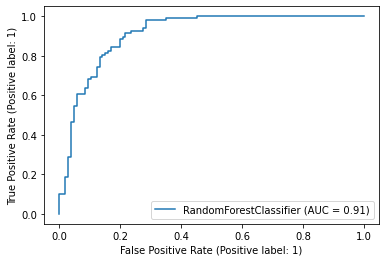

In [261]:
disp = plot_roc_curve(rfc,x_test,y_test)

-  We can conclude, Random Forest Classifier is the best model as the density of area under curve is showing almost 91%.

Let's save the best model.

In [268]:
# model prediction using RF
x_predict = list(rf.predict(x_test))
rf_loan = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_loan))

     predicted_values  orignal_values
247                 1               1
670                 0               0
227                 1               1
290                 0               0
538                 0               1
..                ...             ...
265                 1               1
309                 1               1
90                  1               1
334                 0               0
181                 1               1

[203 rows x 2 columns]


In [269]:
#import joblib
import joblib

joblib.dump(rfc,'rf_loan_file.obj')

# SAVING THE MODEL

['rf_loan_file.obj']

In [270]:
rf_from_joblib=joblib.load('rf_loan_file.obj')
rf_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1])

#### Conclusion:

- The core business of banks is to give loan to eligible applicants and the main profit comes directly from the interest that the customer payback to the bank monthly or annually. But who is a eligible loan applicant it depends on so many factors. Like his Income, his dependents, properties that he owns and so on.
- The provided dataset is containing various features to predict the loan status. For that we have analyzed the data carefully and have understood that good credit history is very much required to get a loan. Other than that people with semiurban properties get loan easily than urban and rural property holders.
- On the basis of such analysis, we have made 6 models out of with Random Forest Classifier has given the best accuracy of 84% and we have saved it.